# Integração Python e SQL

### Objetivo

A integração do Python com o SQL permite que execute comandos SQL diretamente pelo Python no seu banco de dados. Isso vai permitir a gente pegar consultas e já importar elas para dentro de uma análise no Python automaticamente.

### O que vamos precisar

- Para aprender, vamos usar o SQL Server, umas das ferramentas de gerenciamento de banco de dados mais usadas no Mercado. (Vamos instalar gratuitamente)
- Um banco de dados para testar -> usaremos o Contoso, disponibilizado pela Microsoft gratuitamente

### No Python, o que vamos usar

- Biblioteca pyodbc -> pode ser usada com a mesma estrutura para diversos bancos de dados, como SQL Server, MySQL, Oracle, Access, IBM, etc.

### Obs Importante

- Isso não vai ser um curso de SQL, portanto não vamos trabalhar extensivamente os comandos SQL, usaremos apenas alguns para mostrar como funciona a integração das ferramentas

- Conexão com o Banco

In [1]:
# Utilizando o pyodbc

import pyodbc

dados_conexao = ("Driver={SQL Server};"
                "Server=DESKTOP-FRIV7Q1;"
                "Database=ContosoRetailDW;")


# caso necessite de login e senha:

# dados_conexao = ("Driver={SQL Server Native Client 11.0};
#                   "Server=DESKTOP-FRIV7Q1";
#                   "Database=ContosoRetailDW;"
#                   "UID=Login;"
#                   "PWD=Senha;                      
#                  ")

conexao = pyodbc.connect(dados_conexao)
print('Conexão bem Sucedida')

Conexão bem Sucedida


In [36]:
# Utilizando o SQLAlchemy (Recomendado, por ser mais atual)

import sqlalchemy 

server_name = 'localhost'
database_name = 'ContosoRetailDW'
username = 'sa'
password = '1q2w3e4r'

dados_conexao = f'mssql+pyodbc://{username}:{password}@{server_name}/{database_name}?driver=ODBC+Driver+17+for+SQL+Server'

conexao = create_engine(dados_conexao)


try:
    with conexao.connect():
        print('Conexão bem Sucedida')
except Exception as e:
    print("Erro ao conectar: ", e)

Conexão bem Sucedida


- Criando um cursor (uma variável que faz a "interação" python x banco)

Agora podemos executar comandos SQL.

- Temos duas opções:
  - 1. Apenas executar comandos SQL que vão acontecer no banco
  - 2. Executar comando SQL e armazenar a consulta em uma variável no Python, como um dataframe do pandas (utilizando o pandas)

Vamos utilizar a opção 2 por ser mais útil e melhor para o nosso objetivo, até porque normalmente não teremos acesso de edição ao banco de dados.

# Desafio Python e SQL

### Nesse desafio, vamos fazer uma consulta em SQL com uma condição e fazer o tratamento das informações no Python usando o pandas

- Calcule o lucro diário da empresa 

- Tabela com as Vendas -> dbo.FactSales
- Lucro é -> Sales Amount - TotalCost - DiscountAmount
- Lembre que podemos ter mais de 1 transação por dia na tabela, então uma opção é usar o método groupby do pandas
- Sugestão para ajudar na análise é plotar um gráfico do lucro diário

In [51]:
import pandas as pd

vendas_df = pd.read_sql(''' select 
    DateKey,
    SalesAmount,
	TotalCost,
	DiscountAmount
from [dbo].[FactSales]''', conexao)

vendas_df['Lucro'] = vendas_df['SalesAmount'] - vendas_df['TotalCost'] - vendas_df['DiscountAmount']

display(vendas_df)

,DateKey,SalesAmount,TotalCost,DiscountAmount,Lucro
0,2007-01-02,1544.400,728.40,39.600,776.40
1,2007-02-12,78.605,40.60,0.995,37.01
2,2008-01-24,3628.500,1881.27,61.500,1685.73
3,2008-01-13,2254.200,1063.20,57.800,1133.20
4,2008-01-22,10207.080,3468.48,261.720,6476.88
...,...,...,...,...,...
3406084,2007-10-09,4.750,2.40,0.000,2.35
3406085,2007-07-08,11976.000,3967.92,0.000,8008.08
3406086,2009-03-06,849.830,281.52,49.990,518.32
3406087,2007-02-04,20310.750,6843.42,344.250,13123.08


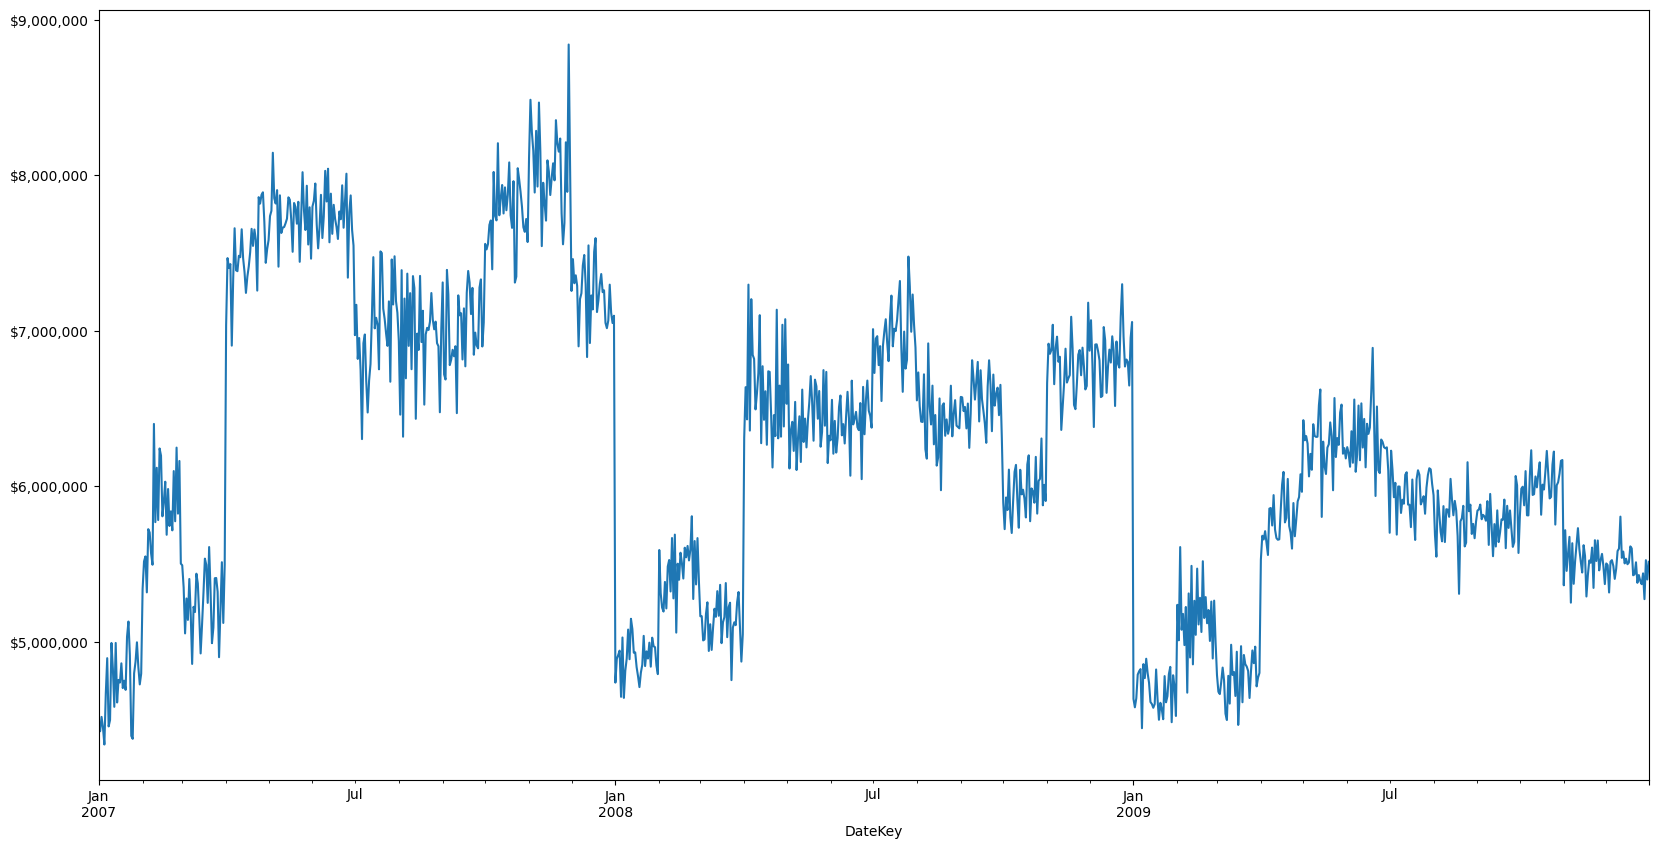

In [54]:
import matplotlib

import matplotlib.pyplot as plt  
vendas_diaria_df = vendas_df.groupby(['DateKey']).sum() 

grafico = vendas_diaria_df['Lucro'].plot(figsize = (20, 10))
grafico.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()